<center><strong><h1>Exploratory Data Analysis (EDA) on sylhet.csv</center></strong></h1>

---


<center><strong><h2> Introduction</center></strong></h2>

<center>In this notebook, we will perform Exploratory Data Analysis (EDA) on the "sylhet.csv" dataset. EDA is a crucial first step in the data analysis process, helping us understand the data's structure, distribution, and relationships. We will explore the dataset and gain insights into its key characteristics.</center>

---

<center><strong><h2>Dataset Information</center></strong></h2>

Source:
[BangladeshChapter_FloodGuard](
https://dagshub.com/Omdena/BangladeshChapter_FloodGuard/src/main/src/data/MeriemData)

Purpose:

Dataset combines weather-related information from various sources and data collection-preprocessing team scraped this data.For

EDA,Model Developnment and Deployment.

---


<center><strong><h2>Setup & Importing Libraries</center></strong></h2>


In [147]:
!pip install plotly 

In [193]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sbs
import plotly.graph_objects as go
import matplotlib.pyplot as plt

<center><strong><h2>Load DataSet</center></strong></h2>


In [226]:
file=pd.read_csv("sylhet.csv")
file.drop("name",axis=1,inplace=True)
file.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2012-06-01,85.4,78.2,81.8,103.1,78.2,89.4,79.4,92.5,1.285,...,10.2,3,NaN,2012-06-01T05:02:56,2012-06-01T18:37:59,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"
1,2012-06-02,89.5,76.9,82.2,104.9,76.9,89.7,78.1,88.2,0.919,...,19.0,7,NaN,2012-06-02T05:02:48,2012-06-02T18:38:26,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"
2,2012-06-03,91.1,74.6,82.9,112.0,74.6,92.0,78.6,87.4,1.305,...,20.5,8,NaN,2012-06-03T05:02:41,2012-06-03T18:38:52,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"
3,2012-06-04,89.9,71.9,81.4,111.4,71.9,89.5,77.8,89.2,1.638,...,16.0,7,NaN,2012-06-04T05:02:35,2012-06-04T18:39:18,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"
4,2012-06-05,90.1,74.0,82.7,108.4,74.0,90.5,78.4,87.5,0.651,...,19.7,7,NaN,2012-06-05T05:02:31,2012-06-05T18:39:43,0.53,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"


In [227]:
file.shape

(4525, 32)

In [228]:
file.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [229]:
file.isnull().sum()

datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1679
snow                3519
snowdepth           3518
windgust            3472
windspeed              0
winddir                0
sealevelpressure      52
cloudcover             0
visibility            47
solarradiation         0
solarenergy            0
uvindex                0
severerisk          3519
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [230]:
file.dtypes

datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

<center><h4>Data Cleaning:</h4></center>

---

<center>Filling Nan values with mean() and mode() such that mean() for "int" or "float" data type and mode() for "object" data type:</center>

In [231]:
for column in file.columns:
    if any(file[column].isnull()):
        if file[column].dtype=='int' or file[column].dtype=='float':
                 file[column].fillna(file[column].mean(),inplace=True)
        elif file[column].dtype=='object':
                 file[column].fillna(file[column].mode().iloc[0],inplace=True)
file.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [232]:
file.shape

(4525, 32)

Removing Duplicates:

<center>There were many duplicates As before removing duplicates the rows were 4525 and after we have 4160 rows.</center> 

In [233]:
file.drop_duplicates(inplace=True)
file.shape

(4160, 32)

<center>Most environmental conditions on Earth have dew points significantly lower than 79.4°C value. Dew points in the range of 10°C to 20°C are considered comfortable and are typical for many temperate regions. Dew points much higher than this are indicative of extremely humid or tropical conditions.</center>

---

<center>There is similar situation with other columns as well.The conversion of units is crucial.</center>

In [234]:
file.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [235]:
def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5/9
    return celsius

In [236]:
Fahrenheit_unit_columns=['tempmax','tempmin','temp','feelslikemax',
       'feelslikemin', 'feelslike', 'dew','humidity']
for column in Fahrenheit_unit_columns:
    file[column]=file[column].apply(fahrenheit_to_celsius)


<center><h4>Now We can That the values are in Celsius and considered to be resonable.</h4></center>

In [237]:
file.head(3)

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2012-06-01,29.666667,25.666667,27.666667,39.500000,25.666667,31.888889,26.333333,33.611111,1.285,...,10.2,3,25.248509,2012-06-01T05:02:56,2012-06-01T18:37:59,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"
1,2012-06-02,31.944444,24.944444,27.888889,40.500000,24.944444,32.055556,25.611111,31.222222,0.919,...,19.0,7,25.248509,2012-06-02T05:02:48,2012-06-02T18:38:26,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"
2,2012-06-03,32.833333,23.666667,28.277778,44.444444,23.666667,33.333333,25.888889,30.777778,1.305,...,20.5,8,25.248509,2012-06-03T05:02:41,2012-06-03T18:38:52,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"41915099999,41891099999,remote"


<h4>Identifying and Removing Outliers:</h4>

---

For numerical columns like tempmax_x, tempmin_x, temp, feelslikemax, and others:
Are there any outliers (box plot)?


Note: I am checking outliers for all numerical columns not going for specific:

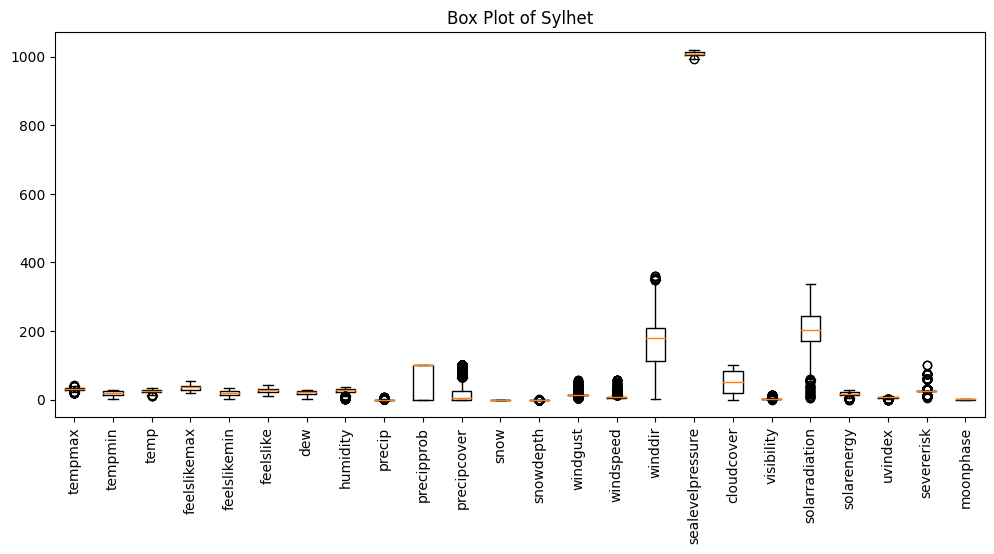

In [238]:
numeric_columns =file.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 5))
plt.boxplot(numeric_columns.values, labels=numeric_columns.columns)
plt.title("Box Plot of Sylhet")
plt.xticks(rotation=90)
plt.show()

In [239]:
columns_having_outliers=['tempmax','temp','humidity','precip','snowdepth','windgust','winddir','visibility','windspeed','solarradiation','solarenergy','uvindex','severerisk','precipcover']
def remove_outliers(data, columns_having_outliers, threshold=1.5):
    data_no_outliers = data.copy()
    for column in columns_having_outliers:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]
    return data_no_outliers
df=remove_outliers(file, columns_having_outliers)
df.shape

(2535, 32)

Covnerting "datetime" feature for further analysis:

<h4> Univariate Analysis</h4>
Summary statistics


In [240]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,...,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03,2535.000000
mean,29.904668,17.841837,23.804580,33.588012,17.837585,25.558207,19.351151,25.732128,0.103786,51.637081,...,6.917594,171.372426,1010.019481,42.461183,2.346461,201.795819,17.422249,7.136489,2.524851e+01,0.482623
std,3.602095,5.648082,4.348799,6.915550,5.779705,6.232660,5.480555,5.494002,0.186205,49.983052,...,1.901150,64.263850,5.069284,31.227646,0.571848,46.553626,4.028563,1.414322,3.873222e-13,0.286820
min,21.333333,4.333333,13.500000,21.333333,2.611111,13.333333,5.333333,10.388889,0.000000,0.000000,...,3.400000,1.300000,991.900000,0.000000,0.800000,68.300000,5.700000,3.000000,2.524851e+01,0.000000
25%,27.055556,13.055556,19.944444,27.166667,13.055556,19.944444,14.666667,22.777778,0.000000,0.000000,...,5.600000,126.600000,1006.200000,13.200000,1.900000,172.850000,14.900000,6.000000,2.524851e+01,0.250000
50%,30.555556,18.222222,24.777778,33.444444,18.222222,25.444444,19.500000,26.888889,0.004000,100.000000,...,6.500000,183.200000,1011.000000,38.000000,2.500000,197.800000,17.100000,7.000000,2.524851e+01,0.480000
75%,32.555556,22.916667,27.611111,39.944444,22.916667,31.000000,24.833333,29.833333,0.128000,100.000000,...,8.000000,212.100000,1013.900000,72.400000,2.700000,235.050000,20.300000,8.000000,2.524851e+01,0.740000
max,39.555556,27.722222,31.444444,49.555556,34.055556,41.166667,27.722222,35.611111,0.882000,100.000000,...,13.800000,348.500000,1020.600000,98.100000,4.300000,320.600000,27.600000,10.000000,2.524851e+01,0.980000


In [241]:
df['datetime_converted']=df.index
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,datetime_converted
7,2012-06-08,32.666667,25.666667,29.555556,42.055556,25.666667,36.277778,26.111111,28.111111,0.172,...,6,25.248509,2012-06-08T05:02:24,2012-06-08T18:40:55,0.62,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"41915099999,41891099999,remote",7
27,2012-06-28,32.666667,25.222222,28.666667,42.000000,25.222222,33.777778,26.000000,30.222222,0.088,...,8,25.248509,2012-06-28T05:05:41,2012-06-28T18:45:54,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,remote,27
28,2012-06-29,33.555556,25.222222,29.222222,42.222222,25.222222,34.500000,25.833333,28.444444,0.000,...,9,25.248509,2012-06-29T05:06:00,2012-06-29T18:45:58,0.34,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,remote,28
29,2012-06-30,32.666667,26.166667,29.000000,41.222222,26.166667,34.944444,26.222222,29.833333,0.000,...,8,25.248509,2012-06-30T05:06:20,2012-06-30T18:46:02,0.38,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,remote,29
30,2012-07-01,33.555556,26.333333,29.444444,42.777778,26.333333,35.444444,26.111111,28.611111,0.737,...,8,25.248509,2012-07-01T05:06:39,2012-07-01T18:46:03,0.41,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,remote,30


<center><h2>Data Visualizations</center></h2>

---

<h3>Temperature Box Plot:</h3>

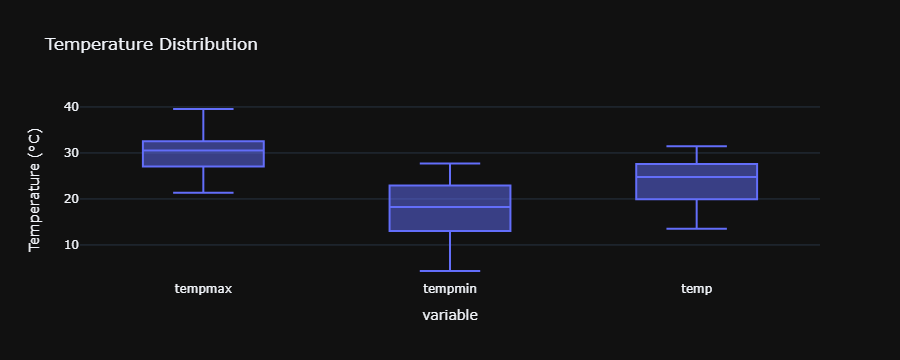

In [242]:
fig = px.box(df, y=['tempmax', 'tempmin', 'temp'], title='Temperature Distribution', template='plotly_dark')
fig.update_layout(yaxis_title='Temperature (°C)')
fig.write_html("Sylhet Temperature Box Plot.html")
fig.show()

<h3>Solar Energy vs. Solar Radiation Scatter Plot</h3>

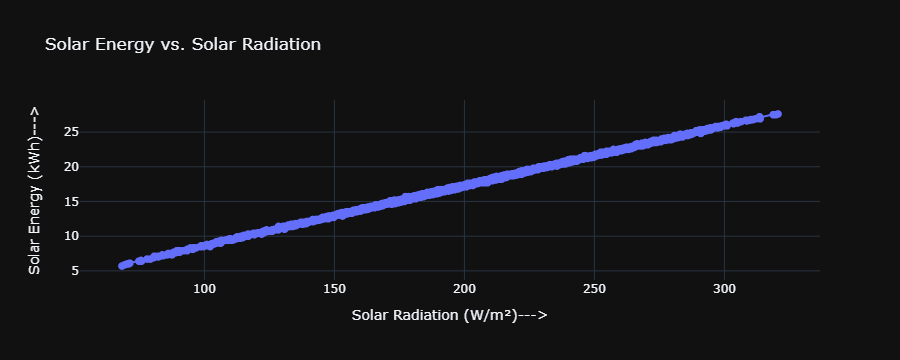

In [243]:
fig = px.scatter(df, x='solarradiation', y='solarenergy', title='Solar Energy vs. Solar Radiation', template='plotly_dark')
fig.update_traces(marker=dict(size=8))
fig.add_traces(px.scatter(df, x='solarradiation',y='solarenergy',trendline='ols').data)
fig.update_layout(xaxis_title='Solar Radiation (W/m²)--->',yaxis_title='Solar Energy (kWh)--->',showlegend=True)
fig.write_html("Sylhet Solar Energy Vs Solar Radiation.html")
fig.show()


<h3>Weather Condition Counts:</h3>

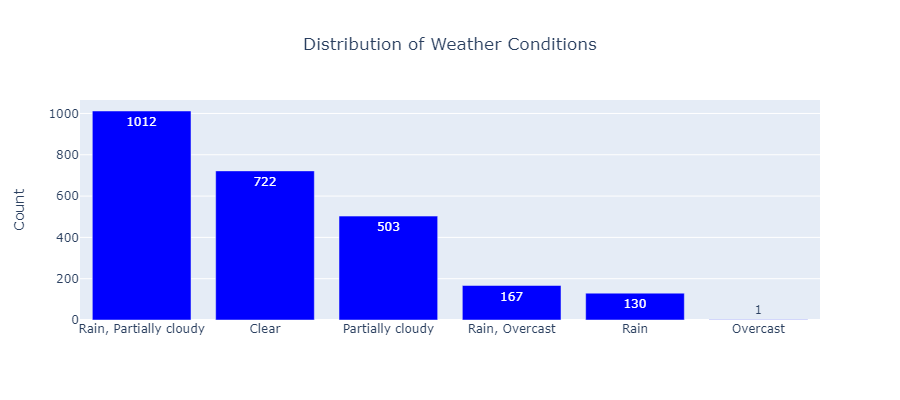

In [244]:
condition_counts = df['conditions'].value_counts().reset_index()
condition_counts.columns = ['Weather Condition', 'Count']
fig = px.bar(condition_counts,x='Weather Condition',y='Count',labels={'Weather Condition': 'Weather Condition', 'Count': 'Count'},
    title='Distribution of Weather Conditions',text='Count',height=400,width=600,color_discrete_sequence=['blue', 'gray', 'green'],)
fig.update_layout(xaxis_title=None,yaxis_title='Count',title_x=0.5,)
fig.write_html('Sylhet_Weather_Condiditions_Distribution.html')
fig.show()

<h3>Wind Rose Chart:</h3>

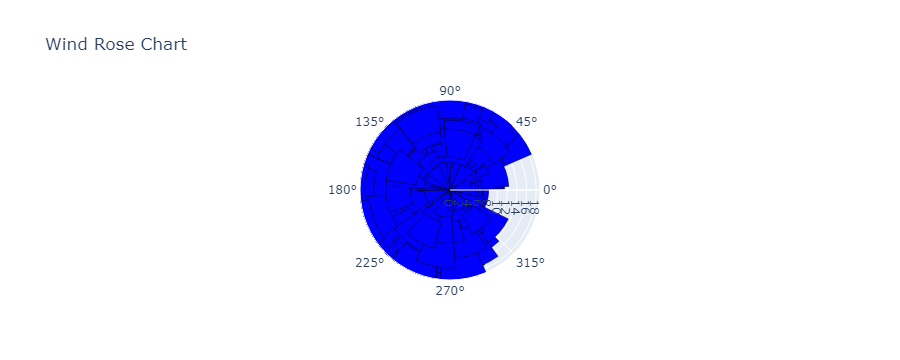

In [245]:
fig = go.Figure()
wind_speed=df.windspeed
wind_direction=df.winddir
fig.add_trace(go.Barpolar(r=wind_speed,theta=wind_direction,marker_color='blue',marker_line_color='black',name='Wind Speed',width=30,))
fig.update_layout(title='Wind Rose Chart',polar=dict(radialaxis=dict(visible=True,range=[0, max(wind_speed) + 5],),),)
fig.write_html("Sylhet_Wind_Rose_Chart.html")
fig.show()

<h3> Precipication Histogram</h3>

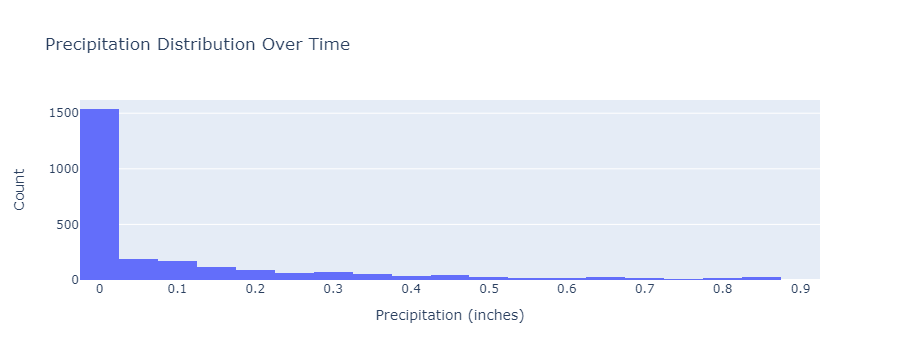

In [246]:
fig = px.histogram(x=df.precip,nbins=20,labels={'x':'Precipitation (inches)'},title='Precipitation Distribution Over Time',)
fig.update_layout(xaxis_title='Precipitation (inches)',yaxis_title='Count')
fig.write_html("Sylhet_Precipitation Distribution Over Time.html")
fig.show()


<h3>UV Index Distribution with High UV Risk Threshold</h3>

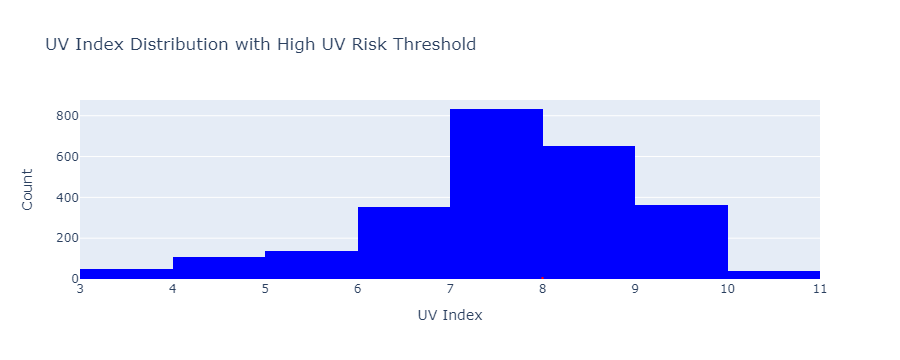

In [247]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['uvindex'],name='UV Index',xbins=dict(start=0,end=15,size=1,),marker_color='blue',))
fig.add_shape(go.layout.Shape(type='line',x0=8,x1=8,y0=0,y1=10,line=dict(color='red', width=2, dash='dash'),name='High UV Risk Threshold'))
fig.update_layout(title='UV Index Distribution with High UV Risk Threshold',xaxis_title='UV Index',yaxis_title='Count',)
fig.show()
fig.write_html("Sylhet_UV_Index_Distribution.html")

<h4>Time Series Analysis:</h4>
Line plots:


---

How UV-Index changes over the time/year?

---

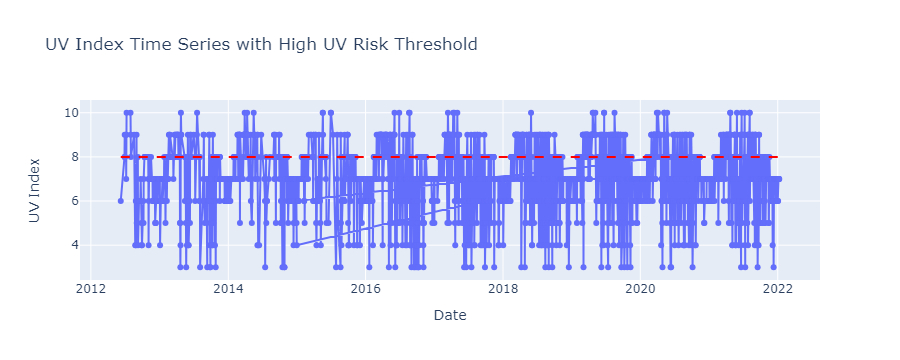

In [249]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['datetime'], y=df['uvindex'], mode='lines+markers', name='UV Index'))
fig.add_shape(go.layout.Shape(type='line',
    x0=df['datetime'].min(),x1=df['datetime'].max(),
    y0=8,y1=8,line=dict(color='red', width=2, dash='dash'),
    name='High UV Risk Threshold',))
fig.update_layout(title='UV Index Time Series with High UV Risk Threshold',xaxis_title='Date', yaxis_title='UV Index')
fig.write_html("Sylhet_UV_Index_Time_Series_with_High_UV_Risk.html")
fig.show()